# Variational Quantum Adiabatic Algorithm (VQAA)

The VQAA solver needs the following parameters: 
- **Register**: The atomic register representing the problem in the quantum device
- **Graph**: The networkx graph used before the encoding to the register 
- **number_best_solution**: The amount of solutions to output from the best ones 
- **omega_range**: The range of frequencies to used for the optimizer parameters. Default (1,5)
- **detuning_range**: The range of detuning to used for the optimizer parameters. Default (1,5)
- **time_range**: The range of time evolution for the adiabatic process to used for the optimizer parameters. Default (8,25)
- **minimizer_method**: Minimizer to use from scipy. Default Nelder-Mead
- **repetitions**: The number of times to repeat the optimization. Default(10) 
- **simple_sequence**: A simple adiabatic sequence with InterpolatedWaveform. Default True
- **complex_sequence**: A complex adiabatic sequence with  RampWaveform. Default False

The output of the VQAA solver is the following:

- **counts**: The dictionary of counts of the QAA with the optimal parameters
- **opt_param**: Optimal parameters for the QAA
- **solution**: The list of solutions given the optimal parameters  

In [11]:
import sys

sys.path.append("../src")

import networkx as nx
from networkx.algorithms import approximation as approx
from pulser import Register
from pulser.devices import Chadoq2

from solver.quantum import solver_VQAA, plot_distribution
from graph.mapping import map_to_UDG

In [13]:
import warnings

warnings.filterwarnings("ignore")

# 1. MIS of a 5 nodes graph 

Maximum independent set of G: {1, 3, 4}


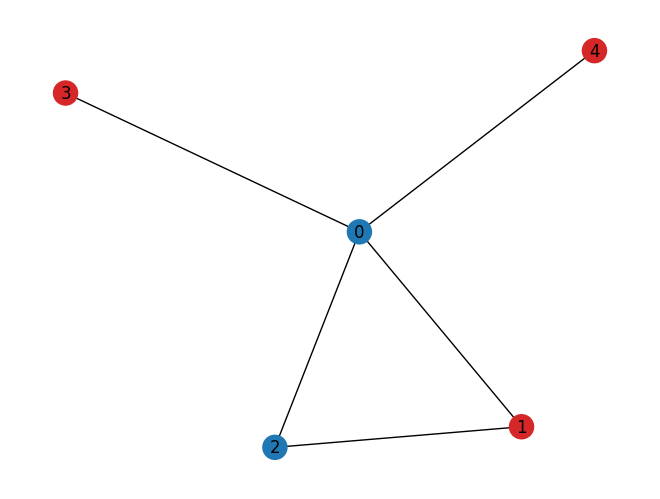

In [14]:
G = nx.Graph(
    [
        (0, 1),
        (0, 2),
        (0, 3),
        (0, 4),
        (1, 2),
    ]
)

I = approx.maximum_independent_set(G)
print(f"Maximum independent set of G: {I}")

pos = nx.spring_layout(G)  # , seed=39299899
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    node_color=["tab:red" if n in I else "tab:blue" for n in G],
)

## 1.1 Embedding by hand

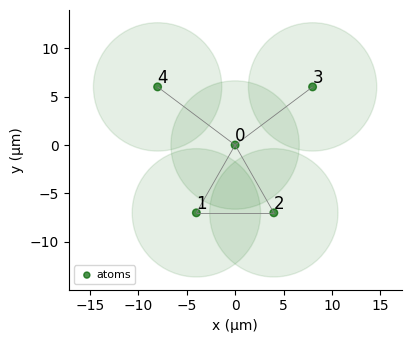

In [15]:
qubits = {"0": (0, 0), "1": (-4, -7), "2": (4, -7), "3": (8, 6), "4": (-8, 6)}
reg_by_hand = Register(qubits)
reg_by_hand.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0), draw_graph=True, draw_half_radius=True
)

## 1.2 Embedding as an optimization process

In [6]:
positions = map_to_UDG(G)

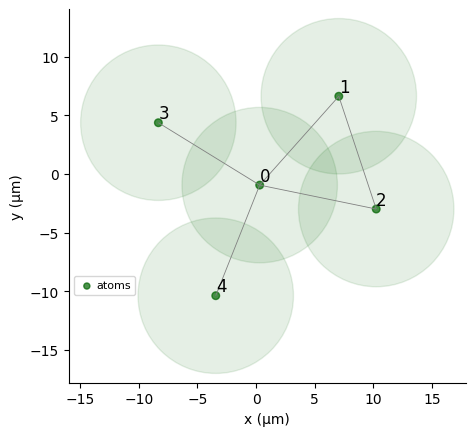

In [7]:
reg = Register(positions)

reg.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0), draw_graph=True, draw_half_radius=True
)

## 1.3 VQAA for MIS in the 5 nodes case  

In [19]:
simple_sequence = True
complex_sequence = False

counts_solution_5_nodes, opt_param_5_nodes, solution_5_nodes = solver_VQAA(
    reg_by_hand,
    G,
    penalty_term=20,
    number_best_solutions=4,
    detuning_range=(0.5, 7),
    time_range=(1, 7),
    repetitions=4,
    simple_sequence=simple_sequence,
    complex_sequence=complex_sequence,
)

In [20]:
if simple_sequence == True:
    print("Optimal time evolution (ns):", opt_param_5_nodes[0])
    print("Optimal omega:", opt_param_5_nodes[1])
    print("Optimal detuning:", opt_param_5_nodes[2])


if complex_sequence == True:
    print("Optimal time evolution 1 (ns):", opt_param_5_nodes[0])
    print("Optimal time evolution 2 (ns):", opt_param_5_nodes[1])
    print("Optimal omega:", opt_param_5_nodes[2])
    print("Optimal detuning:", opt_param_5_nodes[3])
    print("Optimal detuning:", opt_param_5_nodes[4])


print("Best 3 solutions", solution_5_nodes)

Optimal time evolution (ns): 5429.616055098308
Optimal omega: 1.868348298379043
Optimal detuning: 3.021130762334411
Best 3 solutions [['2', '3', '4'], ['1', '3', '4'], ['2', '4'], ['1', '3']]


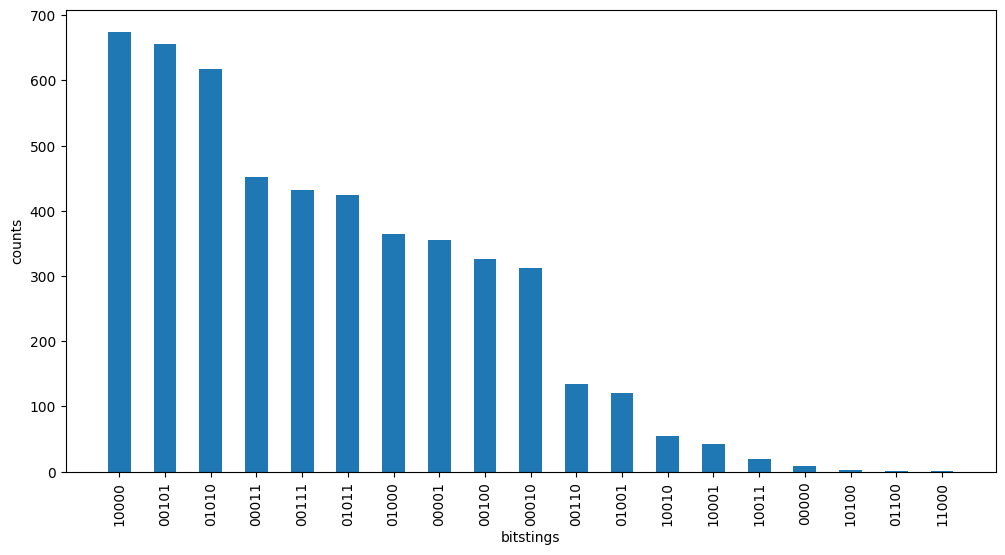

In [18]:
plot_distribution(counts_solution_5_nodes)

# 2. MIS of a 6 nodes graph 

Maximum independent set of G: {1, 4}


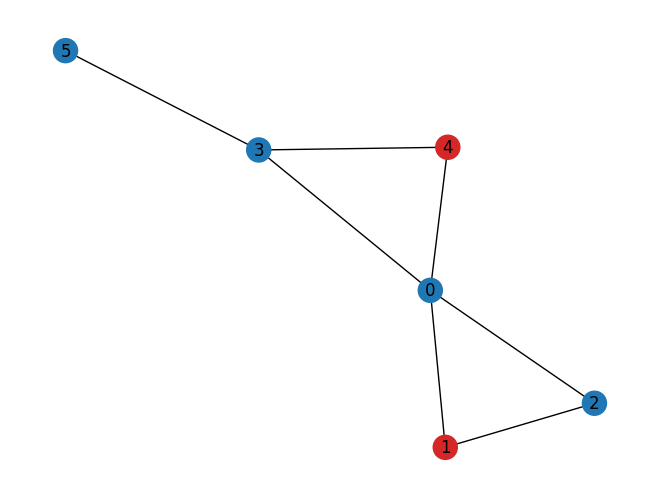

In [15]:
G_6 = nx.Graph([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (3, 4), (3, 5)])

I = approx.maximum_independent_set(G_6)
print(f"Maximum independent set of G: {I}")

nx.draw(
    G_6,
    with_labels=True,
    node_color=["tab:red" if n in I else "tab:blue" for n in G_6],
)

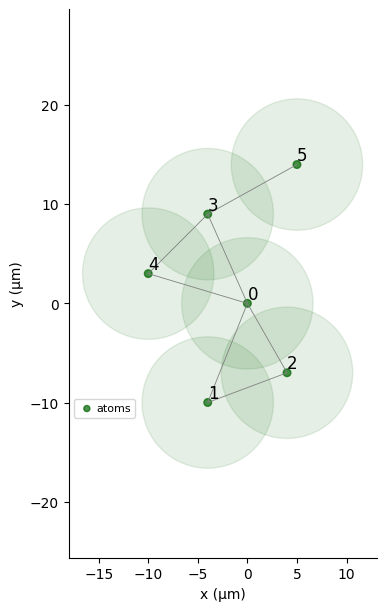

In [18]:
qubits = {"0": (0, 0), "1": (-4, -10), "2": (4, -7), "3": (-4, 9), "4": (-10, 3), "5": (5, 14)}
reg_by_hand_6 = Register(qubits)
reg_by_hand_6.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0), draw_graph=True, draw_half_radius=True
)

## 2.3 VQAA for MIS in the 6 nodes case  

In [34]:
simple_sequence = False
complex_sequence = True

counts_solution_6_nodes, opt_param_6_nodes, solution_6_nodes = solver_VQAA(
    reg_by_hand_6,
    G_6,
    penalty_term=15,
    number_best_solutions=8,
    omega_range=(1, 8),
    detuning_range=(1, 8),
    time_range=(3, 8),
    repetitions=5,
    simple_sequence=simple_sequence,
    complex_sequence=complex_sequence,
)

In [35]:
if simple_sequence == True:
    print("Optimal time evolution (ns):", opt_param_6_nodes[0])
    print("Optimal omega:", opt_param_6_nodes[1])
    print("Optimal detuning:", opt_param_6_nodes[2])

if complex_sequence == True:
    print("Optimal time evolution 1 (ns):", opt_param_6_nodes[0])
    print("Optimal time evolution 2 (ns):", opt_param_6_nodes[1])
    print("Optimal omega:", opt_param_6_nodes[2])
    print("Optimal detuning 1:", opt_param_6_nodes[3])
    print("Optimal detuning 2:", opt_param_6_nodes[4])

print("Best solutions", solution_6_nodes)

Optimal time evolution 1 (ns): 6258.988984992001
Optimal time evolution 2 (ns): 3011.45650536
Optimal omega: 7.563625602376378
Optimal detuning 1: 3.435001998023572
Optimal detuning 2: 3.4639800145043234
Best solutions [['1', '4', '5'], ['2', '4', '5'], ['4', '5'], ['2', '3'], ['0', '5'], ['1', '4'], ['2', '4'], ['1', '3']]


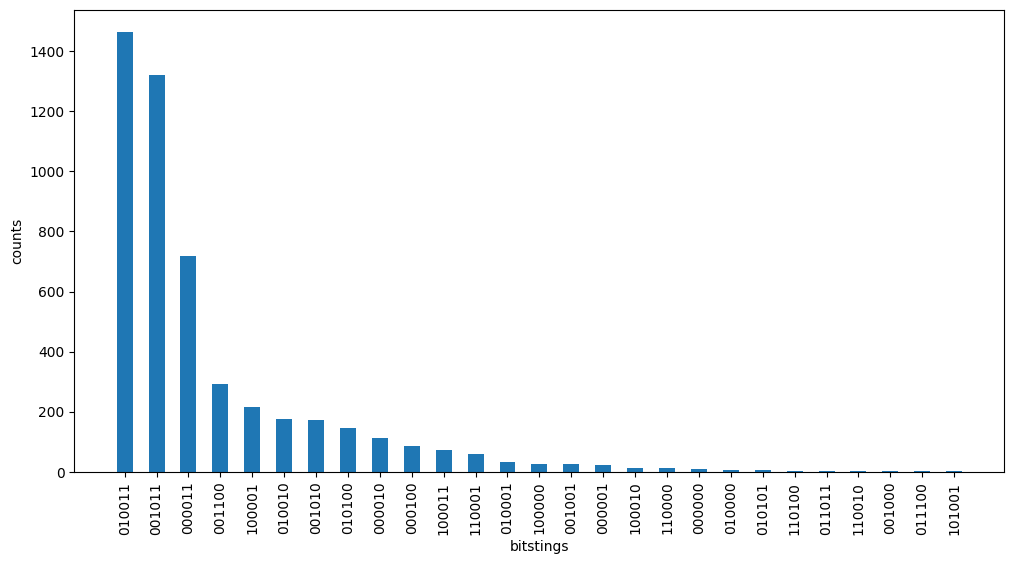

In [36]:
plot_distribution(counts_solution_6_nodes)

# 3. MIS of a 8 nodes graph 

Maximum independent set of G: {3, 4, 5, 6}


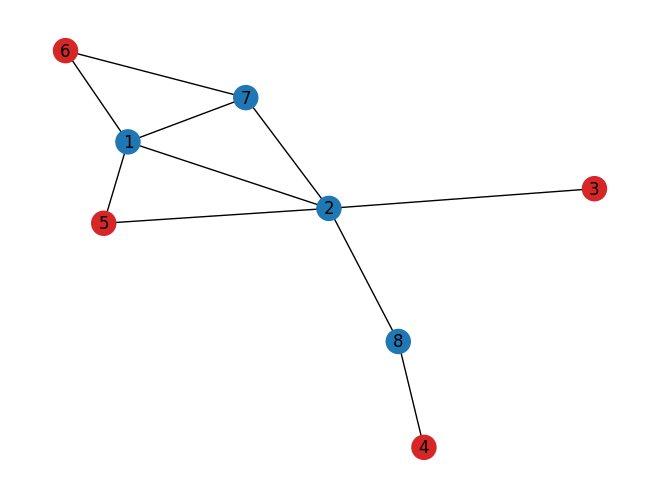

In [38]:
G_8 = nx.Graph(
    [
        (1, 2),
        (7, 2),
        (3, 2),
        (7, 6),
        (5, 2),
        (1, 5),
        (2, 8),
        (1, 7),
        (6, 1),
        (8, 4),
    ]
)

I = approx.maximum_independent_set(G_8)
print(f"Maximum independent set of G: {I}")

pos = nx.spring_layout(G_8, seed=39299899)
nx.draw(
    G_8,
    pos=pos,
    with_labels=True,
    node_color=["tab:red" if n in I else "tab:blue" for n in G_8],
)

## 3.1 Embedding by hand

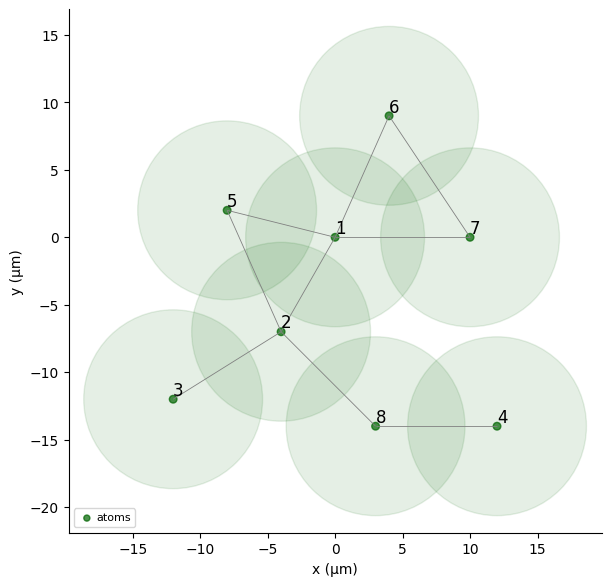

In [39]:
qubits_8 = {
    "1": (0, 0),
    "2": (-4, -7),
    "3": (-12, -12),
    "4": (12, -14),
    "5": (-8, 2),
    "6": (4, 9),
    "7": (10, 0),
    "8": (3, -14),
}
reg_by_hand_8 = Register(qubits_8)
reg_by_hand_8.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0), draw_graph=True, draw_half_radius=True
)

## 3.2 VQAA for MIS in the 8 nodes case  

In [52]:
# QUANTUM SOLVER
simple_sequence = True
complex_sequence = False

counts_solution_8_nodes, opt_param_8_nodes, solution_8_nodes = solver_VQAA(
    reg_by_hand_8,
    G_8,
    penalty_term=30,
    number_best_solutions=14,
    omega_range=(1, 10),
    detuning_range=(1, 10),
    time_range=(2, 16),
    repetitions=5,
    simple_sequence=simple_sequence,
    complex_sequence=complex_sequence,
)

In [53]:
if simple_sequence == True:
    print("Optimal time evolution (ns):", opt_param_8_nodes[0])
    print("Optimal omega:", opt_param_8_nodes[1])
    print("Optimal detuning:", opt_param_8_nodes[2])

if complex_sequence == True:
    print("Optimal time evolution 1 (ns):", opt_param_8_nodes[0])
    print("Optimal time evolution 2 (ns):", opt_param_8_nodes[1])
    print("Optimal omega:", opt_param_8_nodes[2])
    print("Optimal detuning 1:", opt_param_8_nodes[3])
    print("Optimal detuning 2:", opt_param_8_nodes[4])

print("Best solutions", solution_8_nodes)

Optimal time evolution (ns): 4110.665365487419
Optimal omega: 4.708511616008284
Optimal detuning: 4.65956356259802
Best solutions [['3', '4', '5', '6'], ['3', '4', '5', '7'], ['3', '5', '7', '8'], ['3', '4', '6'], ['3', '5', '6', '8'], ['3', '4', '7'], ['3', '4', '5'], ['3', '4', '6', '7'], ['3', '6', '8'], ['3', '7', '8'], ['4', '5', '7'], ['5', '7', '8'], ['4', '5', '6'], ['3', '6', '7', '8']]


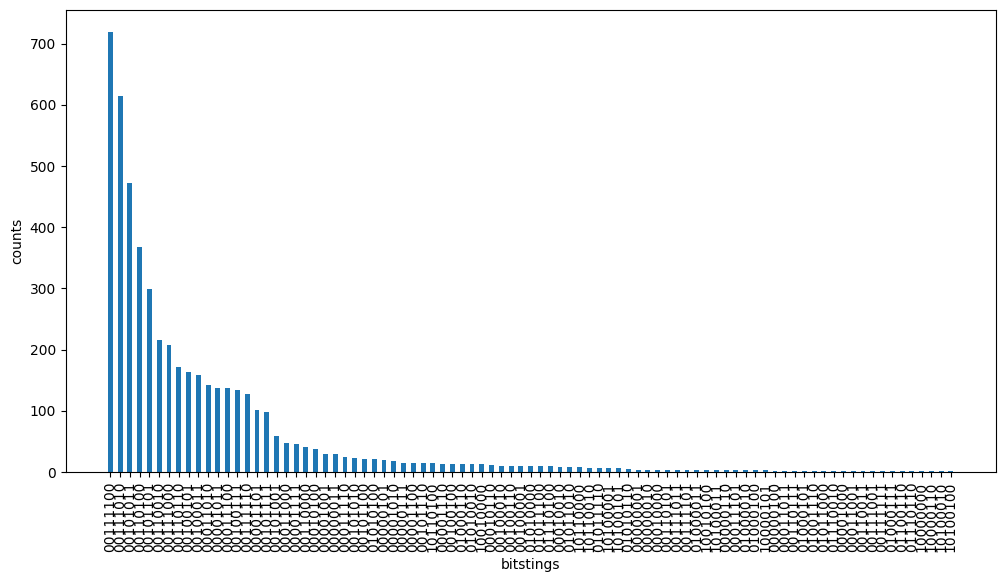

In [54]:
plot_distribution(counts_solution_8_nodes)